In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:06<00:00, 193MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generator for batches of pictures
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize image and labels
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


In [8]:
# Create model to pass data
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) # We use BN here to improve the efficiency of the model
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

Epoch 1/10
625/625 [==============================] - 81s 108ms/step - loss: 1.5343 - accuracy: 0.5908 - val_loss: 0.7038 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5857 - accuracy: 0.7017 - val_loss: 0.5290 - val_accuracy: 0.7470
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4865 - accuracy: 0.7711 - val_loss: 0.4860 - val_accuracy: 0.7566
Epoch 4/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4280 - accuracy: 0.8033 - val_loss: 0.6322 - val_accuracy: 0.6494
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3868 - accuracy: 0.8307 - val_loss: 0.4753 - val_accuracy: 0.7740
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3386 - accuracy: 0.8533 - val_loss: 0.4142 - val_accuracy: 0.8122
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2416 - accuracy: 0.9007 - val_loss: 0.4459 - val_ac

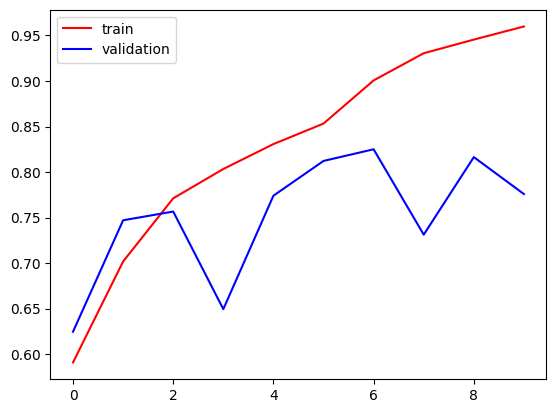

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

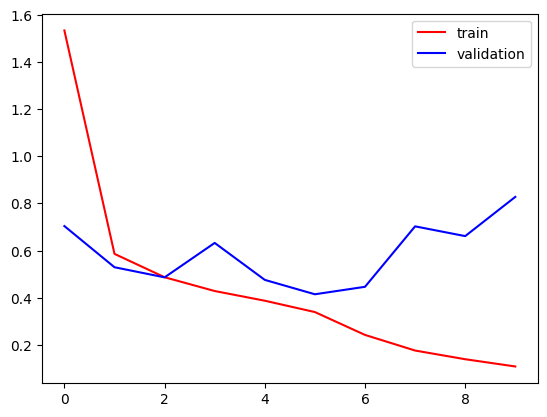

In [27]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [18]:
test_img = cv2.imread('/content/cat.jpg')

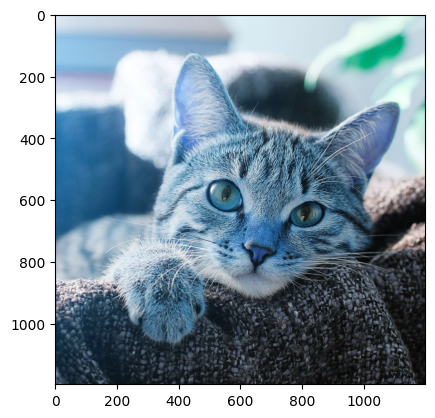

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(1197, 1200, 3)

In [21]:
test_img = cv2.resize(test_img, (256, 256,)) # reduce size of  image

In [22]:
test_input = test_img.reshape((1, 256, 256, 3)) # 1 image in batch with dimensions 256 x 256

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 290ms/step


array([[0.]], dtype=float32)